In [1]:
%matplotlib inline

In [2]:
import numpy as np

from msslib.utils import *
import matplotlib.pyplot as plt
import matplotlib as mpl

import functools as f

from sklearn import metrics

In [3]:
def normalise_confusion_matrix(cm: np.ndarray):
    return cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(plt, score):
    c_m = normalise_confusion_matrix(score['c_matrix'])
    plt.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)

In [4]:
test_runs = ["A","B","C","D","E","F"]
results_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/20blocks/LDA_nearest_centroid/"
label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/labels/"


In [5]:
test_results = []
for letter in test_runs:
    results_paths = listpaths(os.path.join(results_dir, letter))
    label_paths = [format_path(label_dir, 'png', only_basename(p)) for p in results_paths]

    load_results = map(lambda x: np.load(x).flatten(), results_paths)
    results = f.reduce(lambda x,y: np.append(y, x), load_results)

    load_labels = map(lambda x: misc.imread(x).flatten(), label_paths)
    labels = f.reduce(lambda x,y: np.append(y, x), load_labels)

    p,r,fs,_ = metrics.precision_recall_fscore_support(labels, results, average='weighted')
    print(fs, "---", p, r)
    c_m = metrics.confusion_matrix(labels, results)

    test_results.append(
        {'label': letter, 
         'precision': p,
         'recall': r,
         'fscore': fs,
         'c_matrix': c_m
        })

np.save(os.path.join(results_dir, "results.npy"), np.asarray(test_results))

0.728085566064 --- 0.746808093076 0.754570453704
0.82378211286 --- 0.827855625663 0.823321444444
0.787085576461 --- 0.803041768323 0.780304462963
0.799094516511 --- 0.806865420895 0.797251962963
0.795552109468 --- 0.794022460348 0.80011862963
0.813293239316 --- 0.806916241639 0.822368101852


In [12]:
cont_test_res = test_results

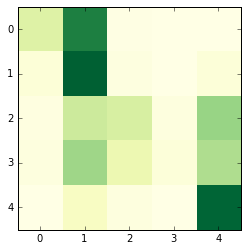

In [10]:
plot_confusion_matrix(plt, test_results[0])